## Day 0 vs Day 30
The data used in this notebook is lymphocyte data for two patient's B cells and T cells from 2 time points. We use this data to show the proteome variation between collection times. 

Here, we note presence/absense changes and quantify fold changes using a T test.


### Access data
First, we import our data package. This brings the functions defined there into scope so we can use them in this script. Then we can create a proteomic dataset object and store it as <code>prot</code>. You can select versions and subjects with <code>load_dataset</code>.

Calling <code>head</code> shows the first several lines of the dataframe, which provides an idea of the type of data present and the structure of the dataframe.

In [1]:
import longitudinalCLL
prot = longitudinalCLL.get_proteomic()
prot2 = longitudinalCLL.get_proteomic()

prot.load_dataset(version='July_noMBR_FP', subjects = [1])
prot2.load_dataset(version='July_noMBR_FP', subjects = [2])

prot.data_raw.head()

,Subject1_B_cells_062920_C_10,Subject1_B_cells_062920_C_11,Subject1_B_cells_062920_C_12,Subject1_B_cells_062920_C_13,Subject1_B_cells_062920_C_9,Subject1_B_cells_072920_C_4,Subject1_B_cells_072920_C_5,Subject1_B_cells_072920_C_6,Subject1_B_cells_072920_C_8,Subject1_B_cells_072920_C_9,Subject1_T_cells_062920_D_10,Subject1_T_cells_062920_D_11,Subject1_T_cells_062920_D_12,Subject1_T_cells_062920_D_13,Subject1_T_cells_062920_D_9,Subject1_T_cells_072920_D_2,Subject1_T_cells_072920_D_4,Subject1_T_cells_072920_D_5,Subject1_T_cells_072920_D_6,Subject1_T_cells_072920_D_7
Protein ID,,,,,,,,,,,,,,,,,,,,
A0A0B4J2D5,3203277.5,4697996.0,7346776.5,8472867.0,4280919.5,0.0,4787781.50,2153860.2,5444238.5,5514300.50,1452451.2,0.0,219754.92,0.00,679607.9,2275364.50,3411472.8,0.0,1205392.9,1030751.8
A0AVT1,1917388.2,3033529.2,3773018.8,1865758.6,5191332.5,3332031.5,2464089.00,2290868.2,2486001.2,2596365.20,0.0,2869977.5,0.00,0.00,1394525.6,2804357.20,1830829.1,1185091.1,1250515.2,1041313.3
A0FGR8,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,756851.44,0.0,0.0,0.0,1197022.1
A6NHR9,2650513.5,0.0,3788095.8,0.0,0.0,1845555.5,933499.44,1958162.5,1604476.4,418360.38,907359.0,0.0,0.00,159779.72,0.0,0.00,0.0,0.0,1074709.6,0.0
A8K2U0,0.0,0.0,0.0,1149867.8,0.0,0.0,0.00,0.0,2272656.2,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0


Our next steps will require separating the runs by cell type, to compare B cells to T cells. As you see above, the pattern for naming the columns is Subject, B or T cell type, date, and the replicate number. Here we define the list of cell types that the functions should look for based on the naming pattern.

Note that the <code>prot</code> data is only from subject 1, which could also be specified <code>cell_types=['Subject1_B_cells_062920', 'Subject1_B_cells_072920']</code>
This could also be simplified as <code>cell_types=['B_cells_07', 'B_cells_06']</code> as the only requirement is that this string is in all replicates that you want to include and no other samples.

In [2]:
cell_types=['B_cells_072920', 'B_cells_062920']

We can check which proteins are only identified in one cell type. We'll set these aside for now, in the <code>data_in_one_type</code> dataframe. For our analysis, present in more than half, or at least 3 out of 5 replicates, is considered clear although it is interesting to note those proteins identified in all replicates of one type.

In [3]:
present_only_in = prot.check_presence_absence(min_reps=3, cell_types=cell_types, null_value=0).dropna()

print("Proteins identified only in:")
print(present_only_in.value_counts())
data_in_one_type =prot.data_frame.loc[present_only_in.index]
data_in_one_type['Type'] = present_only_in

Proteins identified only in:
B_cells_072920    78
B_cells_062920    12
dtype: int64


In [4]:
present_only_in_2 = prot2.check_presence_absence(min_reps=3, cell_types=cell_types, null_value=0).dropna()

print("Proteins identified only in:")
print(present_only_in.value_counts())
data_in_one_type_2 =prot2.data_frame.loc[present_only_in.index]
data_in_one_type_2['Type'] = present_only_in_2

Proteins identified only in:
B_cells_072920    78
B_cells_062920    12
dtype: int64


The <code>min_reps</code> is the minimum number of replicates required to list a protein as present in one type. This can be changed, i.e., <code>min_reps=5</code> to determine the proteins identified in all 5 replicates of a single type. Be careful not set it to a number greater than the replicates run or no proteins will be returned.

In [5]:
present_5of5_only_in = prot.check_presence_absence(min_reps=5, cell_types=cell_types, null_value=0).dropna()

In [6]:
present_5of5_only_in_2 = prot2.check_presence_absence(min_reps=5, cell_types=cell_types, null_value=0).dropna()

In [7]:
print("Proteins identified in 5/5 replicates only in:")
print(present_5of5_only_in.value_counts())
data_in_5of5_one_type =prot.data_frame.loc[present_5of5_only_in.index]
data_in_5of5_one_type['Type'] = present_5of5_only_in

Proteins identified in 5/5 replicates only in:
B_cells_072920    11
B_cells_062920     4
dtype: int64


In [8]:
print("Proteins identified in 5/5 replicates only in:")
print(present_5of5_only_in_2.value_counts())
data_in_5of5_one_type_2 =prot2.data_frame.loc[present_5of5_only_in.index]
data_in_5of5_one_type_2['Type'] = present_5of5_only_in_2

Proteins identified in 5/5 replicates only in:
B_cells_072920    90
B_cells_062920     5
dtype: int64


### Filter data 
Next, we select the proteins that are measured in at least three samples from each group, allowing the calculations to proceed without imputed zero-handling.

In [9]:
indecies = prot.check_n_of_each_type(cell_types=cell_types, null_value=0)
prot.data_frame = prot.data_frame[indecies]

In [10]:
indecies_2 = prot2.check_n_of_each_type(cell_types=cell_types, null_value=0)
prot2.data_frame = prot2.data_frame[indecies_2]

In [11]:
print ("Total groups identified:")
print(prot.data_raw.shape[0])

print ("Proteins identified in at least 3 of each cell type:\t")
print (prot.data_frame.shape[0])

Total groups identified:
2426
Proteins identified in at least 3 of each cell type:	
1122


In [12]:
print ("Total groups identified:")
print(prot2.data_raw.shape[0])

print ("Proteins identified in at least 3 of each cell type:\t")
print (prot2.data_frame.shape[0])

Total groups identified:
2426
Proteins identified in at least 3 of each cell type:	
1135


Before any analysis, we log normalize and median normalize across runs. We need to do this after filtering for consistently expressed proteins so those only identified in some rows do not throw off the normalization.

In [13]:
prot.normalize()

#prot.data_frame.head()

,Subject1_B_cells_062920_C_10,Subject1_B_cells_062920_C_11,Subject1_B_cells_062920_C_12,Subject1_B_cells_062920_C_13,Subject1_B_cells_062920_C_9,Subject1_B_cells_072920_C_4,Subject1_B_cells_072920_C_5,Subject1_B_cells_072920_C_6,Subject1_B_cells_072920_C_8,Subject1_B_cells_072920_C_9,Subject1_T_cells_062920_D_10,Subject1_T_cells_062920_D_11,Subject1_T_cells_062920_D_12,Subject1_T_cells_062920_D_13,Subject1_T_cells_062920_D_9,Subject1_T_cells_072920_D_2,Subject1_T_cells_072920_D_4,Subject1_T_cells_072920_D_5,Subject1_T_cells_072920_D_6,Subject1_T_cells_072920_D_7
Protein ID,,,,,,,,,,,,,,,,,,,,
A0A0B4J2D5,-0.907284,-0.614455,0.324358,0.129667,-0.620956,NaN,-0.311569,-1.484273,-0.248072,-0.127279,-2.251177,NaN,-4.932781,NaN,-3.325712,-1.427978,-0.862720,NaN,-2.361136,-2.695371
A0AVT1,-1.647690,-1.245503,-0.637034,-2.053420,-0.342772,-0.837361,-1.269872,-1.395303,-1.378975,-1.213963,NaN,-1.206813,NaN,NaN,-2.288712,-1.126406,-1.760617,-2.441295,-2.308117,-2.680664
A8MWD9,-1.705659,-0.897494,-1.544551,-0.890077,-1.331158,NaN,-0.411948,-0.585962,-1.004273,-0.964572,NaN,-2.440606,NaN,NaN,-2.463485,-0.448648,-1.677343,-1.502907,-0.581798,NaN
O00148,1.756529,1.663173,1.728240,1.342271,1.153263,1.725132,1.529139,1.568251,1.306042,1.397598,1.304878,1.166107,1.406438,1.304433,1.253088,1.272149,1.186986,1.227216,1.426776,1.299393
O00151,0.363874,0.358541,0.339119,0.198522,0.203450,0.979911,1.094552,0.934537,0.569258,0.845804,NaN,NaN,-3.448459,-2.321541,-2.206959,-0.557094,-1.260376,-0.836514,-0.851017,-0.579521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P62891,-1.492198,-1.406654,-1.376146,-1.055795,-1.227822,NaN,-0.456711,-0.283975,-0.606453,-0.430345,-0.791613,-1.003668,-0.173203,-0.546825,-0.716860,NaN,-0.203491,-0.139948,-0.078113,-0.708715
Q16563,NaN,-1.274117,-0.733469,-0.523787,NaN,NaN,-1.479278,NaN,-0.663565,-1.861305,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Q6BDS2,4.617630,2.760630,NaN,NaN,2.859740,2.562322,3.907445,2.983677,1.548954,3.721366,4.738559,NaN,4.612580,4.037585,1.445404,4.536025,3.901479,1.143441,3.373929,1.327737


In [14]:
prot2.normalize()

#prot2.data_frame.head()

,Subject2_B_cells_062920_E_11,Subject2_B_cells_062920_E_12,Subject2_B_cells_062920_E_13,Subject2_B_cells_062920_E_16,Subject2_B_cells_062920_E_9,Subject2_B_cells_072920_E_1,Subject2_B_cells_072920_E_2,Subject2_B_cells_072920_E_4,Subject2_B_cells_072920_E_5,Subject2_B_cells_072920_E_7,...,Subject2_T_cells_062920_F_12,Subject2_T_cells_062920_F_13,Subject2_T_cells_062920_F_14,Subject2_T_cells_062920_F_9,Subject2_T_cells_072920_F_1,Subject2_T_cells_072920_F_3,Subject2_T_cells_072920_F_4,Subject2_T_cells_072920_F_5,Subject2_T_cells_072920_F_6,Subject2_T_cells_072920_F_8
Protein ID,,,,,,,,,,,,,,,,,,,,,
A0AVT1,-1.527998,-1.561431,NaN,-1.452184,NaN,NaN,-2.465358,-0.893308,-1.835162,-1.739436,...,-2.568679,-3.361549,-3.549985,NaN,NaN,NaN,NaN,-2.874807,-2.256912,NaN
A6NHR9,-0.764262,-1.392726,-1.424490,-1.279980,-3.256592,-1.516467,-1.880991,-1.481149,-2.103805,-1.643162,...,NaN,NaN,NaN,NaN,-3.739504,NaN,NaN,NaN,-3.484590,-2.680249
A8MWD9,-3.559681,-0.818561,-1.058135,NaN,-1.580312,-1.548625,-3.329704,-1.670727,NaN,-1.452554,...,NaN,NaN,NaN,-1.261906,-0.237535,-1.282895,-1.637779,-4.380759,-1.475489,NaN
O00148,1.835712,1.819637,1.819495,1.494635,1.601738,1.235148,1.481961,1.662952,1.551758,1.802674,...,1.449518,1.108128,1.692753,1.409062,1.602150,1.420930,1.340205,1.346073,1.512034,1.440320
O00151,0.738653,0.899835,0.915515,0.991889,0.038411,0.513751,1.104235,0.965626,0.941106,0.911324,...,-0.664246,-1.929102,-1.089269,-1.483741,NaN,-1.315770,-1.222997,-0.721689,-1.723913,-1.149714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Q8NDC0,NaN,-1.827981,-1.471047,NaN,-1.395796,-1.687640,-1.559382,-0.848960,-1.832415,-1.199482,...,-7.105583,-2.333510,-2.409326,NaN,-1.625236,-1.873024,-1.909248,-2.105315,-1.164081,-1.201873
Q8N131,-1.005917,-0.545279,-1.292698,-0.485246,-0.680382,NaN,-1.533366,NaN,-1.486404,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Q9BXT2,-0.632656,NaN,-0.294329,NaN,-0.734254,NaN,-0.851003,-0.089636,-1.053820,-0.821363,...,-0.615356,NaN,-0.515508,NaN,-0.859714,-0.907595,-0.974572,0.082780,-1.100058,0.300496


### Analysis
Now we calulate p values using a ttest. 

In [15]:
#Call ttest function
tstats = prot.ttest_wrapper(cell_types=cell_types)
tstats

,statistic,pvalue
Protein ID,,
A0A0B4J2D5,NaN,NaN
A0AVT1,-0.102259,0.921068
A8MWD9,NaN,NaN
O00148,-0.168091,0.870684
O00151,6.156584,0.000272
...,...,...
P62891,NaN,NaN
Q16563,NaN,NaN
Q6BDS2,NaN,NaN


In [16]:
#Call ttest function
tstats_2 = prot2.ttest_wrapper(cell_types=cell_types)
tstats_2

,statistic,pvalue
Protein ID,,
A0AVT1,NaN,NaN
A6NHR9,-0.195635,0.849242
A8MWD9,NaN,NaN
O00148,-1.546456,0.156397
O00151,0.940302,0.371613
...,...,...
Q8NDC0,NaN,NaN
Q8N131,NaN,NaN
Q9BXT2,NaN,NaN


Here we calculate fold change.

In [17]:
fc_comp = 'log2(30)-log2(0)'
tstats[fc_comp] = prot.get_fold_changes(cell_types=cell_types)

In [18]:
tstats

,statistic,pvalue,log2(30)-log2(0)
Protein ID,,,
A0A0B4J2D5,NaN,NaN,NaN
A0AVT1,-0.102259,0.921068,-0.033811
A8MWD9,NaN,NaN,NaN
O00148,-0.168091,0.870684,-0.023463
O00151,6.156584,0.000272,0.592112
...,...,...,...
P62891,NaN,NaN,NaN
Q16563,NaN,NaN,NaN
Q6BDS2,NaN,NaN,NaN


In [19]:
fc_comp_2 = 'log2(30)-log2(0)'
tstats_2[fc_comp_2] = prot2.get_fold_changes(cell_types=cell_types)

In [20]:
tstats_2

,statistic,pvalue,log2(30)-log2(0)
Protein ID,,,
A0AVT1,NaN,NaN,NaN
A6NHR9,-0.195635,0.849242,-0.078082
A8MWD9,NaN,NaN,NaN
O00148,-1.546456,0.156397,-0.164685
O00151,0.940302,0.371613,0.170345
...,...,...,...
Q8NDC0,NaN,NaN,NaN
Q8N131,NaN,NaN,NaN
Q9BXT2,NaN,NaN,NaN


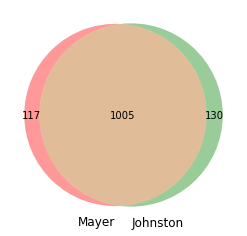

In [21]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
from matplotlib_venn import venn3
venn2(subsets = (set(tstats.index), set(tstats_2.index)), set_labels = ('Mayer', 'Johnston'))
#plt.savefig('data/diff_overlap_2.png')
plt.show()

Fold change and p values allow us to create a volcano plot.

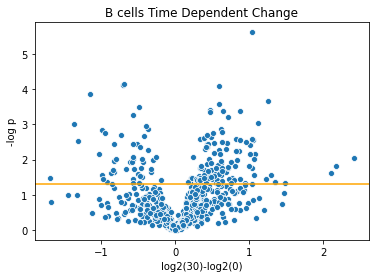

In [22]:
#graph volcano
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import log10
tstats['-log p'] = -log10(tstats['pvalue'])

figure = sns.scatterplot(x=fc_comp, y='-log p',data=tstats)
figure.set_title("B cells Time Dependent Change")
#plt.axvline(1, color ='orange')
#plt.axvline(-1, color ='orange')
plt.axhline(-log10(.05), color ='orange')
plt.show()

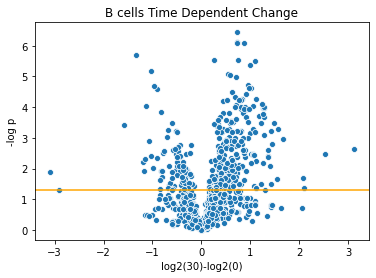

In [23]:
#graph volcano
tstats_2['-log p'] = -log10(tstats_2['pvalue'])

figure = sns.scatterplot(x=fc_comp_2, y='-log p',data=tstats_2)
figure.set_title("B cells Time Dependent Change")
#plt.axvline(1, color ='orange')
#plt.axvline(-1, color ='orange')
plt.axhline(-log10(.05), color ='orange')
plt.show()

Next we will identify the altered proteins.

In [24]:
altered = prot.is_altered(tstats, pvalue=.05, change_factor=False,
                          change_col=fc_comp, cell_types=cell_types)

In [25]:
altered_2 = prot2.is_altered(tstats_2, pvalue=.05, change_factor=False,
                          change_col=fc_comp_2, cell_types=cell_types)

In [26]:
tstats.loc[altered.index]

,statistic,pvalue,log2(30)-log2(0),-log p
Protein ID,,,,
O00151,6.156584,0.000272,0.592112,3.565388
O00483,2.821230,0.022451,0.463044,1.648758
O14745,3.443456,0.008779,2.421507,2.056555
O14773,5.752113,0.000428,0.643337,3.368598
O14979,-4.488614,0.002032,-0.741820,2.691975
...,...,...,...,...
Q96C86,2.575954,0.032822,0.393685,1.483832
Q99832,3.066962,0.015419,0.353774,1.811949
Q9UII2,-6.801759,0.000138,-1.155283,3.861457


In [27]:
tstats_2.loc[altered_2.index]

,statistic,pvalue,log2(30)-log2(0),-log p
Protein ID,,,,
O00483,6.594799,0.000100,0.786119,4.000558
O14602,-2.871585,0.018429,-0.807087,1.734497
O14745,3.320670,0.008931,0.608084,2.049111
O15144,2.411379,0.039160,0.411781,1.407153
O15145,3.221717,0.010461,0.450541,1.980445
...,...,...,...,...
Q9ULV4,-3.145611,0.011821,-0.803729,1.927355
Q9Y3U8,5.118892,0.000629,1.104601,3.201407
Q9Y5B9,2.495851,0.034093,0.490842,1.467333


These are significantly altered (p<0.01) without restricting by the magnitude of change:

In [28]:
altered.value_counts()

B_cells_072920    118
B_cells_062920     50
dtype: int64

In [29]:
altered_2.value_counts()

B_cells_072920    256
B_cells_062920     84
dtype: int64

In [30]:
print("Here are counts for other p and change cutoffs:")
print("P<0.05, >150% of the other type")
print(prot.is_altered(tstats, pvalue=.05,change_factor=1.5,change_col=fc_comp, cell_types=cell_types).value_counts()) #50% increase from either
print("\nP<0.05, >200% of the other type")
print(prot.is_altered(tstats, pvalue=.05,change_factor=2,change_col=fc_comp, cell_types=cell_types).value_counts()) #Double
print("\nP<0.05, >500% of the other type")
print(prot.is_altered(tstats, pvalue=.05,change_factor=5,change_col=fc_comp, cell_types=cell_types).value_counts()) #5 times larger

print("\nP<0.01, >150% of the other type")
print(prot.is_altered(tstats, pvalue=.01,change_factor=1.5,change_col=fc_comp, cell_types=cell_types).value_counts()) #50% increase from either
print("\nP<0.01, >200% of the other type")
print(prot.is_altered(tstats, pvalue=.01,change_factor=2,change_col=fc_comp, cell_types=cell_types).value_counts()) #Double
print("\nP<0.01, >500% of the other type")
print(prot.is_altered(tstats, pvalue=.01,change_factor=5,change_col=fc_comp, cell_types=cell_types).value_counts()) #5 times larger

Here are counts for other p and change cutoffs:
P<0.05, >150% of the other type
B_cells_072920    59
B_cells_062920    23
dtype: int64

P<0.05, >200% of the other type
B_cells_072920    20
B_cells_062920     5
dtype: int64

P<0.05, >500% of the other type
B_cells_072920    1
dtype: int64

P<0.01, >150% of the other type
B_cells_072920    27
B_cells_062920    11
dtype: int64

P<0.01, >200% of the other type
B_cells_072920    10
B_cells_062920     4
dtype: int64

P<0.01, >500% of the other type
B_cells_072920    1
dtype: int64


In [31]:
print("Here are counts for other p and change cutoffs:")
print("P<0.05, >150% of the other type")
print(prot2.is_altered(tstats_2, pvalue=.05,change_factor=1.5,change_col=fc_comp_2, cell_types=cell_types).value_counts()) #50% increase from either
print("\nP<0.05, >200% of the other type")
print(prot2.is_altered(tstats_2, pvalue=.05,change_factor=2,change_col=fc_comp_2, cell_types=cell_types).value_counts()) #Double
print("\nP<0.05, >500% of the other type")
print(prot2.is_altered(tstats_2, pvalue=.05,change_factor=5,change_col=fc_comp_2, cell_types=cell_types).value_counts()) #5 times larger

print("\nP<0.01, >150% of the other type")
print(prot2.is_altered(tstats_2, pvalue=.01,change_factor=1.5,change_col=fc_comp_2, cell_types=cell_types).value_counts()) #50% increase from either
print("\nP<0.01, >200% of the other type")
print(prot2.is_altered(tstats_2, pvalue=.01,change_factor=2,change_col=fc_comp_2, cell_types=cell_types).value_counts()) #Double
print("\nP<0.01, >500% of the other type")
print(prot2.is_altered(tstats_2, pvalue=.01,change_factor=5,change_col=fc_comp_2, cell_types=cell_types).value_counts()) #5 times larger

Here are counts for other p and change cutoffs:
P<0.05, >150% of the other type
B_cells_072920    133
B_cells_062920     31
dtype: int64

P<0.05, >200% of the other type
B_cells_072920    42
B_cells_062920    10
dtype: int64

P<0.05, >500% of the other type
B_cells_072920    2
B_cells_062920    1
dtype: int64

P<0.01, >150% of the other type
B_cells_072920    105
B_cells_062920     19
dtype: int64

P<0.01, >200% of the other type
B_cells_072920    33
B_cells_062920     8
dtype: int64

P<0.01, >500% of the other type
B_cells_072920    2
dtype: int64


### Differentially expressed proteins

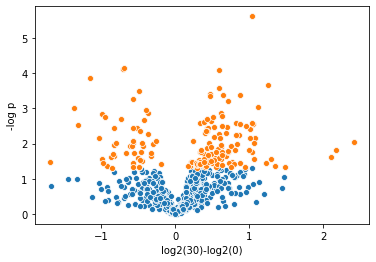

In [32]:
figure = sns.scatterplot(x=fc_comp,y='-log p',data=tstats)
figure2 = sns.scatterplot(x=fc_comp,y='-log p',
                          data=tstats.loc[altered.index])
plt.rc('axes',labelsize=16)
#plt.xticks(fontsize=14)
#plt.yticks(fontsize=14)
#plt.title("B cells vs T cells", fontsize=20)

#plt.savefig("testing/data/0_v_30_sub1.png", bbox_inches='tight', dpi=300)

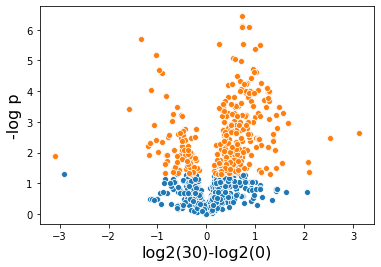

In [33]:
figure = sns.scatterplot(x=fc_comp_2,y='-log p',data=tstats_2)
figure2 = sns.scatterplot(x=fc_comp_2,y='-log p',
                          data=tstats_2.loc[altered_2.index])
plt.rc('axes',labelsize=16)
#plt.xticks(fontsize=14)
#plt.yticks(fontsize=14)
#plt.title("B cells vs T cells", fontsize=20)

#plt.savefig("testing/data/0_v_30_sub2.png", bbox_inches='tight', dpi=300)

This shows the differentially expressed proteins. Recall that this dataset is restricted to those expressed in at least three of each cell type.

The next step is to identify those proteins by name. Here we get the protein names from the fasta file, which remain the same regardless of which software the data was quantified using.


*Note that this function doesn't really have a place in the new set up yet.*

In [34]:
import pandas as pd
def load_fasta(file="longitudinalCLL/data/uniprot-filtered-proteome_3AUP000005640_reviewed_human.fasta"):
    
    #file is formated:
    #>sp|Q96IY4|CBPB2_HUMAN Carboxypeptidase B2 OS=Homo sapiens OX=9606 GN=CPB2 PE=1 SV=2
    #MKLCS...
    headings = {}
    with open(file) as f:
        for line in f:
            if line.startswith('>'):#header line
                ID = line.split('|')[1]
                name=line.split('|')[2].split('=')[0].strip('OS')
                headings[ID]=name
    headings = pd.Series(list(headings.values()), index=headings.keys())
    
    return headings

In [35]:
protein_names = load_fasta()

In [36]:
import pandas as pd
protein_names_by_group={}
for ID in prot.data_raw.index:
    if ';' in ID:
        ids = ID.split(';')
        names=''
        for i in ids:
            if i in protein_names.index:
                names=names + protein_names[i] + ';'
        names = names[:-1]
        protein_names_by_group[ID] = names
    else:
        if ID in protein_names.index:
            protein_names_by_group[ID]=protein_names[ID]
protein_names_by_group = pd.Series(list(protein_names_by_group.values()), index=protein_names_by_group.keys())

In [37]:
protein_names_by_group_2={}
for ID in prot2.data_raw.index:
    if ';' in ID:
        ids = ID.split(';')
        names=''
        for i in ids:
            if i in protein_names.index:
                names=names + protein_names[i] + ';'
        names = names[:-1]
        protein_names_by_group_2[ID] = names
    else:
        if ID in protein_names.index:
            protein_names_by_group_2[ID]=protein_names[ID]
protein_names_by_group_2 = pd.Series(list(protein_names_by_group_2.values()), index=protein_names_by_group_2.keys())

Here we add the names to the <code>tstats</code> dataframe, which contains the fold changes for each protein. Then we can list the proteins that are altered. Optionally, use <code> head()</code> to display the first few or <code>to_csv</code> to write out to a file. We now split up the proteins heightened in B cells from those heightened in T cells.

In [38]:
tstats['Name']=protein_names_by_group
tstats['GeneID'] = tstats.Name.apply(lambda n: str(n).split('_HUMAN')[0])

altered_proteins = tstats.loc[altered.index].sort_values(fc_comp,
                        ascending=False)[['Name','GeneID',fc_comp,'pvalue']]
higher_in_group1 = altered_proteins.loc[altered_proteins[fc_comp] >0]
higher_in_group2 = altered_proteins.loc[altered_proteins[fc_comp] <0]

#To write out to a file, use:
#altered_proteins.to_csv('data/filename.tsv', sep='\t')

In [39]:
tstats_2['Name']=protein_names_by_group_2
tstats_2['GeneID'] = tstats_2.Name.apply(lambda n: str(n).split('_HUMAN')[0])

altered_proteins_2 = tstats_2.loc[altered_2.index].sort_values(fc_comp_2,
                        ascending=False)[['Name','GeneID',fc_comp_2,'pvalue']]
higher_in_group1_2 = altered_proteins_2.loc[altered_proteins_2[fc_comp_2] >0]
higher_in_group2_2 = altered_proteins_2.loc[altered_proteins_2[fc_comp_2] <0]

#To write out to a file, use:
#altered_proteins.to_csv('data/filename.tsv', sep='\t')

Next we do the same for those only identified in one cell type.

In [40]:
data_in_one_type['Name'] = protein_names_by_group
data_in_one_type['GeneID']=data_in_one_type.Name.apply(lambda n: str(n).split('_HUMAN')[0])

group1_only_geneset = data_in_one_type[(data_in_one_type.Type==cell_types[0])]
group2_only_geneset= data_in_one_type[(data_in_one_type.Type==cell_types[1])]

In [41]:
data_in_one_type_2['Name'] = protein_names_by_group_2
data_in_one_type_2['GeneID']=data_in_one_type_2.Name.apply(lambda n: str(n).split('_HUMAN')[0])

group1_only_geneset_2 = data_in_one_type_2[(data_in_one_type_2.Type==cell_types[0])]
group2_only_geneset_2= data_in_one_type_2[(data_in_one_type_2.Type==cell_types[1])]

### Proteins Higher in June:

In [42]:
higher_in_group1

,Name,GeneID,log2(30)-log2(0),pvalue
Protein ID,,,,
O14745,NHRF1_HUMAN Na(+)/H(+) exchange regulatory cof...,NHRF1,2.421507,0.008779
P02763,A1AG1_HUMAN Alpha-1-acid glycoprotein 1,A1AG1,2.179159,0.015043
O75306,NDUS2_HUMAN NADH dehydrogenase [ubiquinone] ir...,NDUS2,2.102583,0.024425
P14854,CX6B1_HUMAN Cytochrome c oxidase subunit 6B1,CX6B1,1.482313,0.046868
P69892,HBG2_HUMAN Hemoglobin subunit gamma-2,HBG2,1.351113,0.042037
...,...,...,...,...
P07741,APT_HUMAN Adenine phosphoribosyltransferase,APT,0.231686,0.032584
Q14847,LASP1_HUMAN LIM and SH3 domain protein 1,LASP1,0.216764,0.034158
P13639,EF2_HUMAN Elongation factor 2,EF2,0.194526,0.040831


In [43]:
higher_in_group1_2

,Name,GeneID,log2(30)-log2(0),pvalue
Protein ID,,,,
P02724,GLPA_HUMAN Glycophorin-A,GLPA,3.122357,0.002256
P26368,U2AF2_HUMAN Splicing factor U2AF 65 kDa subunit,U2AF2,2.533367,0.003469
Q9H9B4,FXN1_HUMAN Sideroflexin-1,FXN1,2.098472,0.042205
P67809,YBOX1_HUMAN Y-box-binding protein 1,YBOX1,2.073728,0.020918
P04233,HG2A_HUMAN HLA class II histocompatibility ant...,HG2A,1.659774,0.001127
...,...,...,...,...
Q9Y490,TLN1_HUMAN Talin-1,TLN1,0.195626,0.005746
P55072,TERA_HUMAN Transitional endoplasmic reticulum ...,TERA,0.181269,0.048025
P11171,41_HUMAN Protein 4.1,41,0.160048,0.027341


In [44]:
#sanity check with a couple proteins
#prot.data_frame.loc['P02775']

### Proteins Only in June:

In [45]:
group1_only_geneset[['Name', 'GeneID']]

,Name,GeneID
Protein ID,,
O00161,NP23_HUMAN Synaptosomal-associated protein 23,NP23
O00244,ATOX1_HUMAN Copper transport protein ATOX1,ATOX1
O00442,RTCA_HUMAN RNA 3'-terminal phosphate cyclase,RTCA
O43681,ASNA_HUMAN ATPase ASNA1,ASNA
O60610,DIAP1_HUMAN Protein diaphanous homolog 1,DIAP1
...,...,...
P28068,DMB_HUMAN HLA class II histocompatibility anti...,DMB
P35030,TRY3_HUMAN Trypsin-3,TRY3
P37235,HPCL1_HUMAN Hippocalcin-like protein 1,HPCL1


In [46]:
group1_only_geneset_2[['Name', 'GeneID']]

,Name,GeneID
Protein ID,,
O00244,ATOX1_HUMAN Copper transport protein ATOX1,ATOX1
O43681,ASNA_HUMAN ATPase ASNA1,ASNA
P41252,"YIC_HUMAN Isoleucine--tRNA ligase, cytoplasmic",YIC
P48147,PPCE_HUMAN Prolyl endopeptidase,PPCE
P49589,"YCC_HUMAN Cysteine--tRNA ligase, cytoplasmic",YCC
P52306,GDS1_HUMAN Rap1 GTPase-GDP dissociation stimul...,GDS1
Q13418,ILK_HUMAN Integrin-linked protein kinase,ILK
Q15121,PEA15_HUMAN Astrocytic phosphoprotein PEA-15,PEA15
Q16719,KYNU_HUMAN Kynureninase,KYNU


### Proteins higher or only in June by GeneID
<code>group1_set</code> is defined here as both the above lists of names, those higher or only in group 1 cells.
Note that this might not be the most interesting set of proteins, ie, when comparing data that was not run together those that appear only in one time are much more likely to be run errors.

In [47]:
group1_set = list(higher_in_group1.GeneID)+list(group1_only_geneset.GeneID)

In [48]:
group1_set_2 = list(higher_in_group1_2.GeneID)+list(group1_only_geneset_2.GeneID)

### Proteins Higher in July:

In [49]:
higher_in_group2.sort_values('pvalue', ascending=True)

,Name,GeneID,log2(30)-log2(0),pvalue
Protein ID,,,,
P40925,"MDHC_HUMAN Malate dehydrogenase, cytoplasmic",MDHC,-0.697160,0.000072
P27695,APEX1_HUMAN DNA-(apurinic or apyrimidinic site...,APEX1,-0.714168,0.000076
Q9UII2,"ATIF1_HUMAN ATPase inhibitor, mitochondrial",ATIF1,-1.155283,0.000138
P09960,LKHA4_HUMAN Leukotriene A-4 hydrolase,LKHA4,-0.486866,0.000316
Q9UI08,EVL_HUMAN Ena/VASP-like protein,EVL,-0.573145,0.000534
P56279,TCL1A_HUMAN T-cell leukemia/lymphoma protein 1A,TCL1A,-1.367644,0.000978
P22626,ROA2_HUMAN Heterogeneous nuclear ribonucleopro...,ROA2,-0.391689,0.001100
Q5SSJ5,HP1B3_HUMAN Heterochromatin protein 1-binding ...,HP1B3,-0.373794,0.001354
P61956,UMO2_HUMAN Small ubiquitin-related modifier 2,UMO2,-0.998122,0.001437


In [50]:
higher_in_group2_2.sort_values('pvalue', ascending=True)

,Name,GeneID,log2(30)-log2(0),pvalue
Protein ID,,,,
Q92522,H1X_HUMAN Histone H1x,H1X,-1.330087,0.000002
P40925,"MDHC_HUMAN Malate dehydrogenase, cytoplasmic",MDHC,-1.025734,0.000007
Q96G03,PGM2_HUMAN Phosphoglucomutase-2,PGM2,-0.967926,0.000020
P09960,LKHA4_HUMAN Leukotriene A-4 hydrolase,LKHA4,-0.911815,0.000026
P98179,RBM3_HUMAN RNA-binding protein 3,RBM3,-1.137013,0.000094
...,...,...,...,...
P63279,UBC9_HUMAN SUMO-conjugating enzyme UBC9,UBC9,-0.570989,0.044678
P05455,LA_HUMAN Lupus La protein,LA,-0.844461,0.046864
P07384,CAN1_HUMAN Calpain-1 catalytic subunit,CAN1,-0.279988,0.047084


### Proteins Only in July:

In [51]:
group2_only_geneset[['Name', 'GeneID']]

,Name,GeneID
Protein ID,,
O95969,G1D2_HUMAN Secretoglobin family 1D member 2,G1D2
P01833,PIGR_HUMAN Polymeric immunoglobulin receptor,PIGR
P02814,MR3B_HUMAN Submaxillary gland androgen-regulat...,MR3B
P28799,GRN_HUMAN Progranulin,GRN
P47929,LEG7_HUMAN Galectin-7,LEG7
Q6VY07,PACS1_HUMAN Phosphofurin acidic cluster sortin...,PACS1
Q8TAX7,MUC7_HUMAN Mucin-7,MUC7
Q9H1E5,TMX4_HUMAN Thioredoxin-related transmembrane p...,TMX4
Q9UGM3,DMBT1_HUMAN Deleted in malignant brain tumors ...,DMBT1


In [52]:
group2_only_geneset_2[['Name', 'GeneID']]

,Name,GeneID
Protein ID,,
O95969,G1D2_HUMAN Secretoglobin family 1D member 2,G1D2
P01833,PIGR_HUMAN Polymeric immunoglobulin receptor,PIGR
P02814,MR3B_HUMAN Submaxillary gland androgen-regulat...,MR3B
Q8TAX7,MUC7_HUMAN Mucin-7,MUC7
Q9UGM3,DMBT1_HUMAN Deleted in malignant brain tumors ...,DMBT1
P02808,TAT_HUMAN Statherin,TAT


### Proteins higher or only in July by GeneID
<code>group2_set</code> is defined here as both the above lists of names, those higher or only in T cells.

In [53]:
group2_set = list(higher_in_group2.GeneID)+list(group2_only_geneset.GeneID)

In [54]:
group2_set_2 = list(higher_in_group2_2.GeneID)+list(group2_only_geneset_2.GeneID)

## Suplementary Table: Distinguished Proteins
Here we combine the data from the four categories in one dataframe and output it to a tab-separated file.

First, we get the names of the distinguished proteins.

In [55]:
distinguished_proteins = pd.concat([higher_in_group1, higher_in_group2])

In [56]:
distinguished_proteins_2 = pd.concat([higher_in_group1_2, higher_in_group2_2])

In [57]:
distinguished_proteins

,Name,GeneID,log2(30)-log2(0),pvalue
Protein ID,,,,
O14745,NHRF1_HUMAN Na(+)/H(+) exchange regulatory cof...,NHRF1,2.421507,0.008779
P02763,A1AG1_HUMAN Alpha-1-acid glycoprotein 1,A1AG1,2.179159,0.015043
O75306,NDUS2_HUMAN NADH dehydrogenase [ubiquinone] ir...,NDUS2,2.102583,0.024425
P14854,CX6B1_HUMAN Cytochrome c oxidase subunit 6B1,CX6B1,1.482313,0.046868
P69892,HBG2_HUMAN Hemoglobin subunit gamma-2,HBG2,1.351113,0.042037
...,...,...,...,...
P50452,PB8_HUMAN Serpin B8,PB8,-1.031299,0.007051
Q9UII2,"ATIF1_HUMAN ATPase inhibitor, mitochondrial",ATIF1,-1.155283,0.000138
P02545,LMNA_HUMAN Prelamin-A/C,LMNA,-1.323313,0.003027


In [58]:
distinguished_proteins_2

,Name,GeneID,log2(30)-log2(0),pvalue
Protein ID,,,,
P02724,GLPA_HUMAN Glycophorin-A,GLPA,3.122357,0.002256
P26368,U2AF2_HUMAN Splicing factor U2AF 65 kDa subunit,U2AF2,2.533367,0.003469
Q9H9B4,FXN1_HUMAN Sideroflexin-1,FXN1,2.098472,0.042205
P67809,YBOX1_HUMAN Y-box-binding protein 1,YBOX1,2.073728,0.020918
P04233,HG2A_HUMAN HLA class II histocompatibility ant...,HG2A,1.659774,0.001127
...,...,...,...,...
O43399,TPD54_HUMAN Tumor protein D54,TPD54,-1.174742,0.011620
Q07812,BAX_HUMAN Apoptosis regulator BAX,BAX,-1.192345,0.006341
Q92522,H1X_HUMAN Histone H1x,H1X,-1.330087,0.000002


Next, we get the intensity data for these proteins.

In [59]:
altered_data = prot.data_frame.loc[distinguished_proteins.index]

In [60]:
altered_data_2 = prot2.data_frame.loc[distinguished_proteins_2.index]

Next, we average by cell type, creating new columns in our <code>distinguished_proteins</code> dataframe.

In [61]:
import numpy as np
samples=np.array(prot.data_raw.columns.values)

from statistics import mean

def mean_noNan(ser):
    ser = ser.dropna()
    if len(ser)==0:
        return np.nan
    return mean(ser)

for cell_type in cell_types:
    cells_of_type = list(s for i,s in enumerate(samples) if cell_type in s)
    type_data = altered_data[cells_of_type]
    means = type_data.apply(mean_noNan, axis=1)
    
    distinguished_proteins[("Mean {0}".format(cell_type))] = means

In [62]:
samples_2=np.array(prot2.data_raw.columns.values)

for cell_type in cell_types:
    cells_of_type = list(s for i,s in enumerate(samples_2) if cell_type in s)
    type_data = altered_data_2[cells_of_type]
    means = type_data.apply(mean_noNan, axis=1)
    
    distinguished_proteins_2[("Mean {0}".format(cell_type))] = means

Here we check the column order and rearrange it as we like.

In [63]:
distinguished_proteins.columns

Index(['Name', 'GeneID', 'log2(30)-log2(0)', 'pvalue', 'Mean B_cells_072920',
       'Mean B_cells_062920'],
      dtype='object')

In [64]:
distinguished_proteins_2.columns

Index(['Name', 'GeneID', 'log2(30)-log2(0)', 'pvalue', 'Mean B_cells_072920',
       'Mean B_cells_062920'],
      dtype='object')

In [65]:
distinguished_proteins = distinguished_proteins[["GeneID", "Mean B_cells_062920", "Mean B_cells_072920", "log2(30)-log2(0)", "pvalue"]]

In [66]:
distinguished_proteins_2 = distinguished_proteins_2[["GeneID", "Mean B_cells_062920", "Mean B_cells_072920", "log2(30)-log2(0)", "pvalue"]]

Here we sort the proteins. This will sort them such that high abundance in B come first, down it low abundance in B, and finally sorting the T only proteins from low to high.

In [67]:
distinguished_proteins.sort_values(["Mean B_cells_062920", "Mean B_cells_072920"], ascending=[False, False], inplace=True)

<ipython-input-67-850e92c8ccdf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  distinguished_proteins.sort_values(["Mean B_cells_062920", "Mean B_cells_072920"], ascending=[False, False], inplace=True)


In [68]:
distinguished_proteins_2.sort_values(["Mean B_cells_062920", "Mean B_cells_072920"], ascending=[False, False], inplace=True)

<ipython-input-68-98fd0e6fd0e1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  distinguished_proteins_2.sort_values(["Mean B_cells_062920", "Mean B_cells_072920"], ascending=[False, False], inplace=True)


Finally, we have the finished dataframe.

In [69]:
#distinguished_proteins
dp = distinguished_proteins['pvalue']
dp

Protein ID
P69905    0.006810
P04908    0.009530
P0C0S8    0.006864
Q16777    0.003120
P69891    0.042088
            ...   
O95861    0.032936
P55036    0.002686
P46459    0.036025
O75306    0.024425
O14745    0.008779
Name: pvalue, Length: 168, dtype: float64

In [70]:
distinguished_proteins_2
dp_2 = distinguished_proteins_2['pvalue']
dp_2

Protein ID
P68871    0.000107
Q8IUE6    0.005956
P02042    0.000093
P06899    0.000101
O60814    0.000135
            ...   
P07948    0.011124
P39748    0.008024
P33992    0.005560
P26196    0.033027
Q9H9B4    0.042205
Name: pvalue, Length: 340, dtype: float64

In [71]:
sub1_v_2_intersection = set(prot.data_raw.index).intersection(set(prot2.data_raw.index))
#mj_intersection = set(j_p.index).intersection(set(mayer_p.index))

In [72]:
significant_in_either = sub1_v_2_intersection.intersection(set(distinguished_proteins.index)).union(
    sub1_v_2_intersection.intersection(set(distinguished_proteins_2.index)))

In [73]:
len(sub1_v_2_intersection.intersection(set(distinguished_proteins.index)))

168

In [74]:
len(sub1_v_2_intersection.intersection(set(distinguished_proteins_2.index)))

340

In [75]:
len(significant_in_either)

425

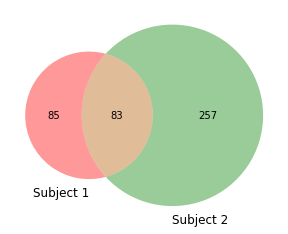

In [76]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
from matplotlib_venn import venn3
venn2(subsets = (set(distinguished_proteins.index), set(distinguished_proteins_2.index)), set_labels = ('Subject 1', 'Subject 2'))
#plt.savefig('testing/data/subject_comp_venn')
plt.show()

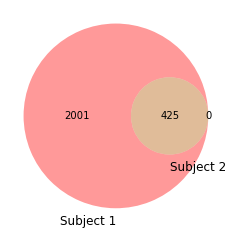

In [77]:
venn2(subsets = (set(sub1_v_2_intersection), set(significant_in_either)), set_labels = ('Subject 1', 'Subject 2'))
plt.show()

In [78]:
a = set(tstats.index)
b = set(tstats_2.index)

In [79]:
df_sub1_v_2_pvals_sig_in_either = pd.DataFrame(index = list(significant_in_either), columns = 
                           ['subject1 -log10(pvalue)', 'subject2 -log10(pvalue)'])

for i in significant_in_either:
    if i in a:
        val = tstats.loc[i]['pvalue']
        df_sub1_v_2_pvals_sig_in_either.loc[i, 'subject1 -log10(pvalue)'] = -log10(val)#since this is p and the other is -log(p)
    else:
        print(i)
    if i in b:
        val = tstats_2.loc[i]['pvalue']
       # print(val)
        df_sub1_v_2_pvals_sig_in_either.loc[i, 'subject2 -log10(pvalue)'] = -log10(val)
    else:
        print(i + "_2")
       # -log10(tstats_2['pvalue'])
#df_junejuly_pvals_sig_in_either.dropna()

P29218_2
P49257
P13693
P14324
P02763_2
P33992
Q9Y4L1
Q9H9B4


In [80]:
print(len(set(df_sub1_v_2_pvals_sig_in_either['subject1 -log10(pvalue)'])))

419


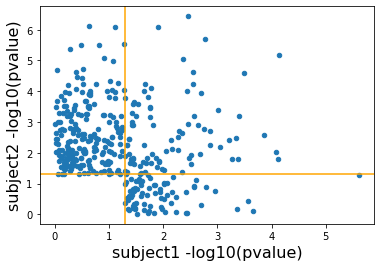

In [81]:
#plt.figure(figsize=(6, 6))
df_sub1_v_2_pvals_sig_in_either.plot.scatter('subject1 -log10(pvalue)', 'subject2 -log10(pvalue)')
plt.axhline(-log10(.05), color ='orange')
plt.axvline(-log10(.05), color ='orange')

#fig.addsubplot(111).set_aspect('equal', adjustable='box')
#plt.savefig('test.png', dpi=300)
#plt.savefig('testing/data/changes_in_subjects_2.png')

In [82]:
import seaborn as sns

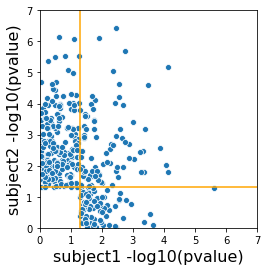

In [83]:
fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal')
sns.scatterplot(data=df_sub1_v_2_pvals_sig_in_either, x='subject1 -log10(pvalue)', y='subject2 -log10(pvalue)')
 
# control x and y limits
plt.ylim(0, 7)
plt.xlim(0, 7)
plt.axhline(-log10(.05), color ='orange')
plt.axvline(-log10(.05), color ='orange')

plt.rc('axes',labelsize=16)
plt.savefig('test.png', dpi=300)

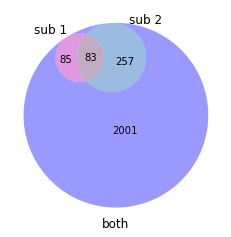

In [84]:
venn3(subsets = (set(distinguished_proteins.index), set(distinguished_proteins_2.index), set(sub1_v_2_intersection)), set_labels = ('sub 1', 'sub 2', 'both'))
plt.show()

In [85]:
df_sub1_v_2_pvals_sig_in_either = pd.DataFrame(index = list(significant_in_either), columns = 
                           ['subject1 -log10(pvalue)', 'subject2 -log10(pvalue)'])

for i in sub1_v_2_intersection:
    if i in a:
        val = tstats.loc[i]['pvalue']
        df_sub1_v_2_pvals_sig_in_either.loc[i, 'subject1 -log10(pvalue)'] = -log10(val)#since this is p and the other is -log(p)
    else:
        print(i)
    if i in b:
        val = tstats_2.loc[i]['pvalue']
       # print(val)
        df_sub1_v_2_pvals_sig_in_either.loc[i, 'subject2 -log10(pvalue)'] = -log10(val)
    else:
        print(i + "_2")
       # -log10(tstats_2['pvalue'])
#df_junejuly_pvals_sig_in_either.dropna()

O95169
O95169_2
Q86WV1
Q86WV1_2
O95299
Q96DI7
Q96DI7_2
P15586
P15586_2
O75037
O75037_2
P30711
P30711_2
Q9NY12
Q9NY12_2
Q8WX92
Q8WX92_2
Q9UK76
P62070
P62070_2
P01700
P01700_2
P57740
P57740_2
Q9BRF8
Q9BRF8_2
P52788
P52788_2
Q86YV0
Q86YV0_2
P28074
P28074_2
Q9UI09
Q9UI09_2
O96000
Q16740
Q16740_2
O95168
O95168_2
P61916
P61916_2
Q9Y3Z3
Q9Y3Z3_2
P19823
P19823_2
Q8TCD5
Q8TCD5_2
Q15126
Q15126_2
Q96BZ4
Q96BZ4_2
P62633
P62633_2
P37235
P37235_2
Q9H910
Q9H910_2
P25490
P25490_2
Q9NQR4
P42765_2
O75015
O75015_2
P08567_2
P50749_2
O43678
O43678_2
Q13642
Q13642_2
Q15020_2
P30086_2
Q92614
Q92614_2
P99999_2
P14927_2
Q86WV6
Q86WV6_2
Q86YP4
Q86YP4_2
Q16539
Q16539_2
P62306
P62306_2
Q8TCS8
Q8TCS8_2
P13473
P13473_2
P02788
O00442
O00442_2
P02760
P02760_2
P55957
P55957_2
O14579
O14579_2
O76096
O76096_2
P53582
P53582_2
Q14764
Q14764_2
Q14574
Q14574_2
P49863
P49863_2
Q9NTK5
Q9NTK5_2
Q15008
Q9HCY8
Q9HCY8_2
P29966
P29966_2
Q969E4
Q969E4_2
Q13510_2
P49736
P49736_2
P26885
Q86X76
Q86X76_2
P25942
P25942_2
Q9Y2D5
Q9Y2D5_2

P18206_2
O95248
O95248_2
Q9BY32
Q9BY32_2
Q9H9Q2
Q9H9Q2_2
P05556
P05556_2
Q15052
Q15052_2
Q15257_2
O15068
O15068_2
Q7L576_2
Q9Y2W2
Q9Y2W2_2
Q9BVG4
Q9BVG4_2
Q14289
P48739
P48739_2
Q05655
Q05655_2
Q13595
Q9BRR6
Q9BRR6_2
Q8ND56
Q8ND56_2
P06493
P06493_2
P49711
P49711_2
Q9GZT3
Q9GZT3_2
P27918
P27918_2
P01023
P01023_2
P02786
P02786_2
P0C0L4
P0C0L4_2
Q86UE4
Q86UE4_2
P00813
P00813_2
Q05315
Q05315_2
Q99598
Q99598_2
Q9BXP5
Q9BXP5_2
Q709C8
Q709C8_2
Q8N131
Q9H0D6
Q9H0D6_2
O76003
O76003_2
P63010_2
Q9BWD1
Q9BWD1_2
Q9H9B4
P35236
P35236_2
Q14061
Q14061_2
P25815
P25815_2
P61086
P61086_2
Q15843
Q15843_2
P80511
P80511_2
Q8N201
Q8N201_2
Q9Y2J8
Q9Y2J8_2
E9PRG8
E9PRG8_2
Q9NZ08
Q9NZ08_2
O95819
O95819_2
P20042
P20042_2
P62072
P62072_2
P40763
P40763_2
P33991
P33991_2
O15173
O15173_2
Q96P63_2
Q05519_2
Q9NR45
P02663
P02663_2
Q9NQC3
Q9NQC3_2
P10153
P10153_2
P09234
P09234_2
Q9NRX4
Q9NRX4_2
P24311
P24311_2
Q08188
Q08188_2
Q9UNL2
Q9UNL2_2
P20962
P20962_2
Q16512
Q16512_2
P11216
P11216_2
Q9NZT2
Q9NZT2_2
Q9Y512
Q9Y512_2

Q96FX8
Q96FX8_2
Q99460
E9PAV3
E9PAV3_2
P49913
P49913_2
P08697
P08697_2
Q9Y3R4
Q9Y3R4_2
Q6ZVX7
Q6ZVX7_2
P33992
Q14161
Q14161_2
P09012
P09012_2
P07738_2
Q96JY6
Q96JY6_2
Q9P2J5
Q9P2J5_2
P52888
P52888_2
Q9BPW8
Q9BPW8_2
O60313_2
Q9UL25
P04275
P04275_2
P62318
P05023
P05023_2
P60228
P28907
P28907_2
Q16378
Q16378_2
Q6NYC8
Q9BY44
Q9BY44_2
P25325
P25325_2
Q8WVM8
Q8WVM8_2
Q5TGZ0_2
O95810
O95810_2
P31151
P31151_2
Q9UKV3
Q9UKV3_2
Q96GG9
Q96GG9_2
P23258
P23258_2
P08603
P08603_2
Q9HD20
Q9HD20_2
P01619
P01619_2
P11172
P11172_2
Q96QA5
Q96QA5_2
Q13561_2
Q15417
Q15417_2
Q99952
Q99952_2
Q9NQG5
P15498
P15498_2
Q9Y6A9
Q9Y6A9_2
Q9NUG4
Q9NUG4_2
P36776
P36776_2
Q15208
Q15208_2
P35542
P35542_2
P61758
P61758_2
Q9Y4L1
Q9Y237_2
O60841
O60841_2
Q02750_2
P48729
P48729_2
Q9UNS2
Q9UNS2_2
P24158
P24158_2
P13765
P13765_2
P50402
P50402_2
P61960
P61960_2
Q15042
Q15042_2
Q6NVY1
P48059
P48059_2
Q7L9L4_2
Q96Q11
Q96Q11_2
P85037
P85037_2
Q7L014
O43252
O43252_2
P51570
P51570_2
Q53TN4
Q53TN4_2
Q14566
Q14566_2
P09417
P09417_2
P17

In [86]:
print(len(set(df_sub1_v_2_pvals_sig_in_either['subject1 -log10(pvalue)'])))

1122


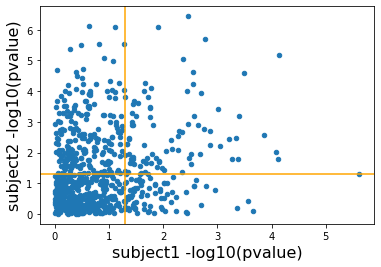

In [87]:
df_sub1_v_2_pvals_sig_in_either.plot.scatter('subject1 -log10(pvalue)', 'subject2 -log10(pvalue)')
plt.axhline(-log10(.05), color ='orange')
plt.axvline(-log10(.05), color ='orange')
#plt.savefig('testing/data/changes_in_subjects.png')

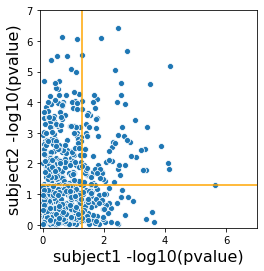

In [89]:
fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal')
sns.scatterplot(data=df_sub1_v_2_pvals_sig_in_either, x='subject1 -log10(pvalue)', y='subject2 -log10(pvalue)')
 
# control x and y limits
plt.ylim(-0.1, 7)
plt.xlim(-0.1, 7)
plt.axhline(-log10(.05), color ='orange')
plt.axvline(-log10(.05), color ='orange')

plt.rc('axes',labelsize=16)

In [ ]:
#from scipy import stats
#stats.pearsonr(df_junejuly_pvals_sig_in_either['subject1 -log10(pvalue)'], df_junejuly_pvals_sig_in_either['subject2 -log10(pvalue)'])

The last step is saving this dataframe to a file.

In [ ]:
#distinguished_proteins.to_csv('data/distinguished_proteins_Sub1B_Day0_vs30_FP_noMBR.tsv', sep='\t')